
# TeleConnect Customer Churn Analysis

This notebook guides you through a complete data science workflow for analyzing and predicting customer churn at a fictional telecom company called TeleConnect.

**Learning Objectives:**
* Apply fundamental statistical concepts to a real-world business problem
* Practice data quality assessment techniques
* Perform hypothesis testing on both numerical and categorical variables
* Visualize distributions and correlations using various plot types
* Extract business insights from data analysis
* Recommend appropriate machine learning models based on data characteristics

Let's explore how statistics and data analysis can help a business reduce customer attrition!



## 1. Business Understanding

Before diving into data analysis, it's important to understand the business context. This helps ensure that our analysis is relevant and actionable.

### Problem Statement
TeleConnect, a telecommunications provider, is facing higher than industry-average customer churn rates. The company wants to understand the key factors that lead to customer attrition and build a predictive model to proactively identify at-risk customers. This would allow them to target retention efforts more effectively and reduce overall churn rates.

> **What is Churn?** Customer churn (or attrition) refers to when customers stop doing business with a company. In the telecom industry, this typically means cancelling their service subscription.

### Business Objectives
1. Identify the main drivers of customer churn at TeleConnect
2. Develop a predictive model to identify customers with high churn probability
3. Recommend targeted strategies to improve customer retention
4. Estimate the financial impact of reducing churn rates

### Current Solutions
Currently, TeleConnect uses a reactive approach:
- The retention team only contacts customers after they call to cancel services
- Standardized retention offers are provided without personalization
- No systematic way to identify at-risk customers before they decide to leave

### Performance Measurement

**Effectiveness (Predictive Performance):**
- Primary Metric: Recall (ability to identify customers who will churn)
- Secondary Metric: Precision (to avoid unnecessary retention costs on false positives)
- Target: At least 80% recall while maintaining reasonable precision

**Efficiency (Runtime):**
- The model should be able to score the entire customer base daily
- Results should be available for the retention team each morning

**Minimum Performance Required:**
- The solution must achieve at least 75% recall and 60% precision
- Must be substantially better than random targeting of retention efforts

**Key Stakeholder Metrics:**
- Churn rate reduction (%)
- Revenue protected ($)
- ROI of retention campaigns
- Customer lifetime value impact



## 2. Exploratory Data Analysis (EDA)

Now we'll explore the telecom customer dataset to understand its structure and characteristics.

### 2.1 Dataset Overview

First, let's load the dataset and understand its basic structure. We'll examine:
- Dataset size (rows and columns)
- Variable types
- Target variable distribution
- Summary statistics

This gives us a foundation for more detailed analysis.


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# For better visualizations
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Load the dataset
df = pd.read_csv('telecom_customer_churn.csv')

# Display basic information
print(f"Dataset Shape: {df.shape}")
print(f"\nTarget Variable Distribution (Churn):\n{df['Churn'].value_counts(normalize=True).round(3) * 100}%")

# Display column information
print("\nColumn Information:")
df.info(memory_usage='deep')


Dataset Shape: (5000, 21)

Target Variable Distribution (Churn):
Churn
No     66.2
Yes    33.8
Name: proportion, dtype: float64%

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         5000 non-null   object 
 1   Age                5000 non-null   int64  
 2   Gender             5000 non-null   object 
 3   Income             4600 non-null   float64
 4   Location           5000 non-null   object 
 5   ContractType       5000 non-null   object 
 6   PaymentMethod      5000 non-null   object 
 7   MonthlyCharges     5000 non-null   float64
 8   TotalCharges       5000 non-null   float64
 9   Tenure             5000 non-null   int64  
 10  CallMinutes        4750 non-null   float64
 11  DataUsage          4850 non-null   float64
 12  ServiceCalls       5000 non-null   int64  
 13  SatisfactionScore 

**Insights:** This dataframe is 3.9 MB in size, has 5000 rows and 21 columns...

In [ ]:
# Display basic statistics for numerical columns
print("Summary Statistics for Numerical Variables:")
df.describe().T


Summary Statistics for Numerical Variables:


,count,mean,std,min,25%,50%,75%,max
Age,5000.0,40.090000,13.937057,18.00,30.0000,40.000,49.000,85.00
Income,4600.0,76278.391304,59111.932461,3800.00,38075.0000,60400.000,95350.000,660200.00
MonthlyCharges,5000.0,64.784430,19.299250,15.00,51.3475,63.590,77.175,141.49
TotalCharges,5000.0,1585.110558,1881.856369,15.26,232.6275,726.305,2452.670,12200.68
Tenure,5000.0,24.273000,26.419161,1.00,4.0000,12.000,42.000,120.00
CallMinutes,4750.0,199.406526,86.294149,20.00,135.0000,188.000,250.000,500.00
DataUsage,4850.0,25.147464,25.251331,0.00,7.0000,17.200,35.600,200.90
ServiceCalls,5000.0,1.987000,1.414790,0.00,1.0000,2.000,3.000,8.00
SatisfactionScore,4400.0,3.801591,1.115290,1.00,3.0000,4.000,5.000,5.00


In [ ]:
# Display basic statistics for numerical columns
print("Summary Statistics for Categorical Variables:")
df.describe(include='O').T

Summary Statistics for Categorical Variables:


,count,unique,top,freq
CustomerID,5000,5000,CID005000,1
Gender,5000,3,Male,2490
Location,5000,3,Urban,2165
ContractType,5000,3,Month-to-Month,2996
PaymentMethod,5000,4,Electronic check,2068
MultipleLines,5000,2,No,3225
InternetService,5000,3,Fiber optic,2264
OnlineSecurity,5000,2,No,3403
TechSupport,5000,2,No,3838
StreamingTV,5000,2,No,3171



### 2.2 Data Quality Assessment

Before drawing conclusions from the data, we need to assess its quality. Poor data quality can lead to inaccurate analysis and misleading insights.

We'll assess four key dimensions of data quality:
1. **Completeness**: Are there missing values?
2. **Correctness**: Are there outliers, duplicates, or invalid values?
3. **Relevance**: Are the variables distributed in a way that's useful for analysis?
4. **Trustworthiness**: Are there inconsistencies between related variables? Are data sources reliable?

#### 2.2.1 Missing Values Analysis

Let's first check for missing values in the dataset. Missing data can impact our analysis and modeling approaches.


Missing Values Analysis:
                   Missing Values  Percentage
SatisfactionScore             600        12.0
Income                        400         8.0
CallMinutes                   250         5.0
DataUsage                     150         3.0


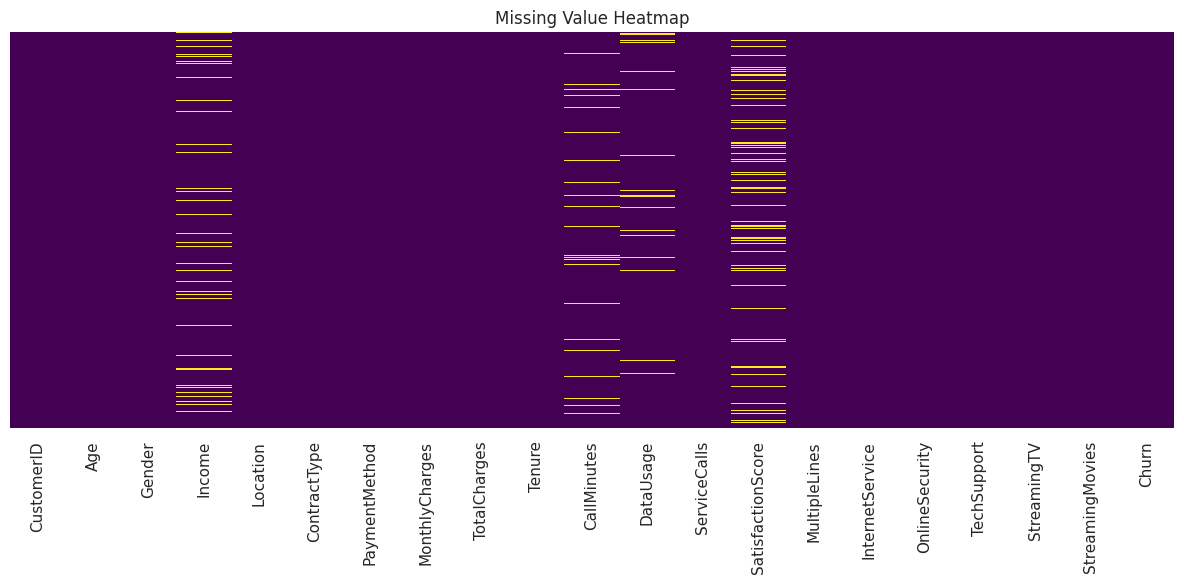


Completeness Analysis:
Total number of cells in the dataset: 105000
Total number of missing values: 1400
Percentage of missing data: 1.33%


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage.round(2)
})

print("Missing Values Analysis:")
missing_values_filter = missing_df['Missing Values'] > 0
print(missing_df[missing_values_filter].sort_values(by='Percentage', ascending=False))

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()

# Summary of completeness
print("\nCompleteness Analysis:")
print(f"Total number of cells in the dataset: {df.size}")
print(f"Total number of missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / df.size * 100).round(2)}%")



#### 2.2.2 Data Correctness Analysis

Next, we'll check for data integrity issues, including:
- Duplicate customer IDs (which shouldn't exist)
- Invalid categorical values
- Outliers in numerical variables using the Interquartile Range (IQR) method

The IQR method defines outliers as values that fall below Q1 - 1.5*IQR or above Q3 + 1.5*IQR, where:
- Q1 is the 25th percentile
- Q3 is the 75th percentile
- IQR is the difference between Q3 and Q1


In [ ]:

# Check for duplicate CustomerIDs
print(f"Number of duplicate CustomerIDs: {df['CustomerID'].duplicated().sum()}")

# Check for invalid values in categorical variables
print("\nUnique values in categorical variables:")

categorical_cols = df.select_dtypes(include=['object']).columns.to_list()

for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")

# Check for outliers in numerical variables using IQR method
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()

print("\nOutlier Analysis:")
for col in numerical_cols:
    if df[col].notna().any():  # Only analyze columns with non-null values
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        #The round function needs to enclose the entire expression
        print(f"{col}: {len(outliers)} outliers ({round((len(outliers)/len(df)*100), 2)}% of data)")

Number of duplicate CustomerIDs: 0

Unique values in categorical variables:
CustomerID: ['CID000001' 'CID000002' 'CID000003' ... 'CID004998' 'CID004999'
 'CID005000']
Gender: ['Male' 'Female' 'Other']
Location: ['Suburban' 'Urban' 'Rural']
ContractType: ['Month-to-Month' 'One Year' 'Two Year']
PaymentMethod: ['Credit card' 'Electronic check' 'Mailed check' 'Bank transfer']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'No' 'Fiber optic']
OnlineSecurity: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Churn: ['Yes' 'No']

Outlier Analysis:
Age: 28 outliers (0.56% of data)
Income: 246 outliers (4.92% of data)
MonthlyCharges: 40 outliers (0.8% of data)
TotalCharges: 217 outliers (4.34% of data)
Tenure: 32 outliers (0.64% of data)
CallMinutes: 81 outliers (1.62% of data)
DataUsage: 215 outliers (4.3% of data)
ServiceCalls: 21 outliers (0.42% of data)
SatisfactionScore: 0 outliers (0.0% of data)



#### 2.2.3 Data Relevance Analysis

Now we'll analyze the distributions and cardinality of our variables to understand:
- How many unique values exist in each categorical variable
- Whether there are rare categories that might need special handling
- The shape of numerical distributions (skewness and kurtosis)

**Skewness** measures the asymmetry of a distribution. A normal distribution has a skewness of 0:
- Positive skewness: Right tail is longer (more high values)
- Negative skewness: Left tail is longer (more low values)

**Kurtosis** measures the "tailedness" of a distribution:
- Higher kurtosis: More outliers (heavy tails)
- Lower kurtosis: Fewer outliers (light tails)
- Normal distribution has a kurtosis of 3 (or 0 for excess kurtosis)


Cardinality Analysis (Categorical Variables):
Gender: 3 unique values, smallest category: 1.46% of data
  - Rare categories: ['Other'] ([73])
Location: 3 unique values, smallest category: 20.86% of data
ContractType: 3 unique values, smallest category: 14.46% of data
PaymentMethod: 4 unique values, smallest category: 14.42% of data
MultipleLines: 2 unique values, smallest category: 35.5% of data
InternetService: 3 unique values, smallest category: 20.18% of data
OnlineSecurity: 2 unique values, smallest category: 31.94% of data
TechSupport: 2 unique values, smallest category: 23.24% of data
StreamingTV: 2 unique values, smallest category: 36.58% of data
StreamingMovies: 2 unique values, smallest category: 34.98% of data


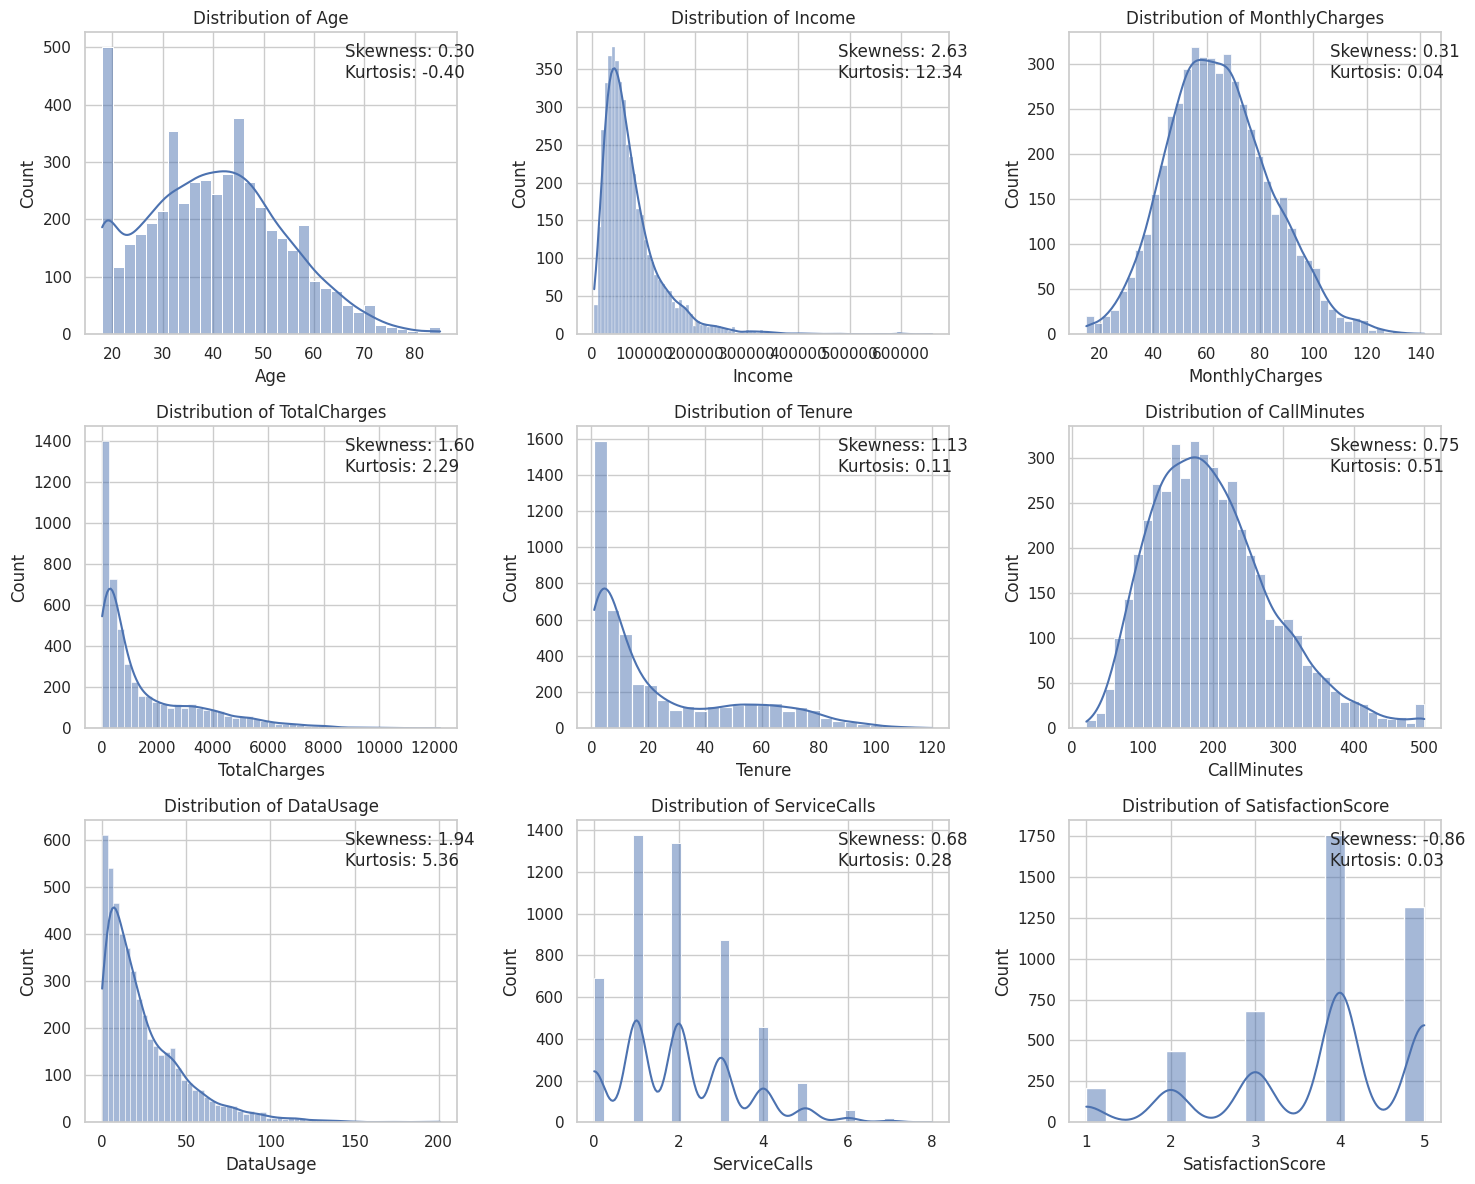

In [ ]:

# Check cardinality of categorical variables
print("Cardinality Analysis (Categorical Variables):")
categorical_cols = df.select_dtypes(include=['object']).columns.to_list()


for col in categorical_cols:
    n_values = df[col].nunique()
    counts = df[col].value_counts()
    min_pct = (counts.min() / counts.sum() * 100).round(2)
    print(f"{col}: {n_values} unique values, smallest category: {min_pct}% of data")

    # Check for rare categories (less than 5% of data)
    rare_categories = counts[counts / counts.sum() < 0.05]
    if not rare_categories.empty:
        print(f"  - Rare categories: {list(rare_categories.index)} ({rare_categories.values})")

# Visualize distributions of key numerical variables
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        if df[col].notna().any():  # Only plot columns with non-null values
            sns.histplot(df[col].dropna(), kde=True, ax=axes[i])
            axes[i].set_title(f'Distribution of {col}')

            # Add skewness and kurtosis
            skewness = df[col].skew()
            kurtosis = df[col].kurt()
            axes[i].annotate(f'Skewness: {skewness:.2f}\nKurtosis: {kurtosis:.2f}',
                             xy=(0.7, 0.85), xycoords='axes fraction')

plt.tight_layout()
plt.show()



#### 2.2.4 Data Trustworthiness / Reliability Analysis

Finally, we'll check for inconsistencies between related variables. For example, we expect TotalCharges to be approximately equal to MonthlyCharges multiplied by Tenure. Large discrepancies could indicate data reliability issues.


In [ ]:

# Check for inconsistencies between related variables
print("Data Consistency Checks:")

# Check if Total Charges are consistent with Monthly Charges and Tenure
df['ExpectedTotal'] = df['MonthlyCharges'] * df['Tenure']
df['TotalChargesDiff'] = ((df['TotalCharges'] - df['ExpectedTotal']).abs() / df['ExpectedTotal']) * 100

inconsistent_total = df[df['TotalChargesDiff'] > 10]  # More than 10% difference
print(f"Customers with inconsistent TotalCharges: {len(inconsistent_total)} ({round((len(inconsistent_total)/len(df)*100), 2)}%)")

# Additional check for 0 MonthlyCharges but positive TotalCharges or vice versa
zero_total_positive_mask = (df['MonthlyCharges'] == 0) & (df['TotalCharges'] > 0)
positive_total_zero_mask = (df['MonthlyCharges'] > 0) & (df['TotalCharges'] == 0)

monthly_zero_total_positive = df[zero_total_positive_filter]
monthly_positive_total_zero = df[positive_total_zero_mask]

print(f"Customers with 0 MonthlyCharges but positive TotalCharges: {len(monthly_zero_total_positive)}")
print(f"Customers with positive MonthlyCharges but 0 TotalCharges: {len(monthly_positive_total_zero)}")

# Clean up temporary columns
df.drop(columns=['ExpectedTotal', 'TotalChargesDiff'], inplace=True)


Data Consistency Checks:
Customers with inconsistent TotalCharges: 0 (0.0%)
Customers with 0 MonthlyCharges but positive TotalCharges: 0
Customers with positive MonthlyCharges but 0 TotalCharges: 0



### 2.3 Normality Tests and Distributions

Many statistical tests assume that data follows a normal distribution. We'll test each numerical variable for normality using:

1. **Shapiro-Wilk Test**: A statistical test where:
   - Null hypothesis (H0): The data is normally distributed
   - Alternative hypothesis (Ha): The data is not normally distributed
   - If p-value < 0.05, we reject the null hypothesis (data is not normal)

2. **Q-Q Plots (Quantile-Quantile plots)**: A visual method to assess normality
   - If points follow the diagonal line, the data is approximately normal
   - Deviations from the line indicate departures from normality

Identifying non-normal distributions is important for choosing appropriate:
- Correlation methods (Pearson vs. Spearman)
- Statistical tests (parametric vs. non-parametric)
- Data transformations (log, Box-Cox, etc.)


Normality Tests (Shapiro-Wilk):
Age: p-value = 0.0000000000 (Not Normal)
Income: p-value = 0.0000000000 (Not Normal)
MonthlyCharges: p-value = 0.0000000000 (Not Normal)
TotalCharges: p-value = 0.0000000000 (Not Normal)
Tenure: p-value = 0.0000000000 (Not Normal)
CallMinutes: p-value = 0.0000000000 (Not Normal)
DataUsage: p-value = 0.0000000000 (Not Normal)
ServiceCalls: p-value = 0.0000000000 (Not Normal)
SatisfactionScore: p-value = 0.0000000000 (Not Normal)


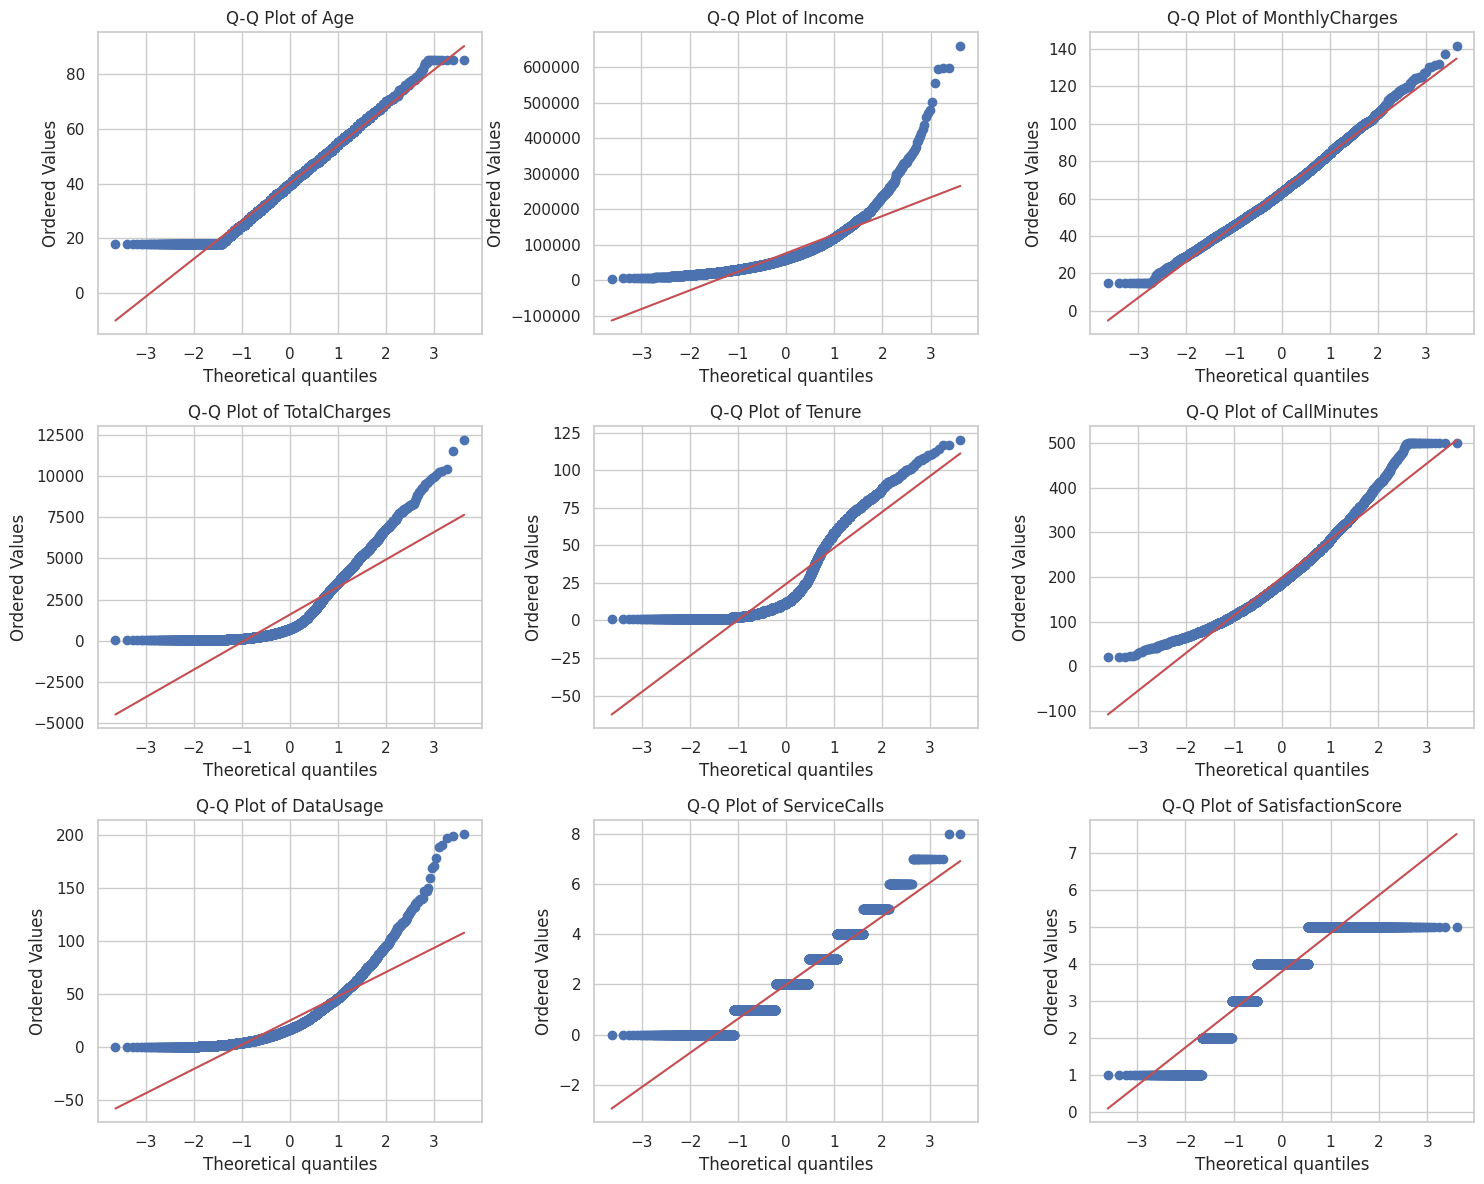

In [ ]:

# Perform normality tests on numerical variables
print("Normality Tests (Shapiro-Wilk):")
for col in numerical_cols:
    if df[col].notna().any():  # Only test columns with non-null values
        # Take a sample if dataset is large (Shapiro-Wilk limited to 5000 samples)
        sample = df[col].dropna().sample(min(5000, df[col].count()))
        stat, p = stats.shapiro(sample, nan_policy='omit')
        print(f"{col}: p-value = {p:.10f} {'(Normal)' if p > 0.05 else '(Not Normal)'}")

# Create Q-Q plots for a visual normality check
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        if df[col].notna().any():  # Only plot columns with non-null values
            stats.probplot(df[col].dropna(), plot=axes[i])
            axes[i].set_title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()



### 2.4 Scale Analysis and Outliers

Now we'll examine the scale and outliers of numerical variables using box plots. Box plots show:

- The median (middle line in the box)
- The interquartile range or IQR (the box itself, from Q1 to Q3)
- The whiskers (typically extend to 1.5 * IQR)
- Outliers (points beyond the whiskers)

This helps us understand:
- The central tendency and spread of each variable
- The presence and severity of outliers
- Whether variables are on different scales (which would require scaling)

Variables with different scales can cause problems in certain algorithms (like k-means clustering or neural networks), while variables with outliers may need special handling to avoid biasing our analysis.


In [ ]:
my_list = ['a', 'b', 'c']
enumerate(my_list, start=1)

In [ ]:
print(list(enumerate(my_list)))

[(0, 'a'), (1, 'b'), (2, 'c')]


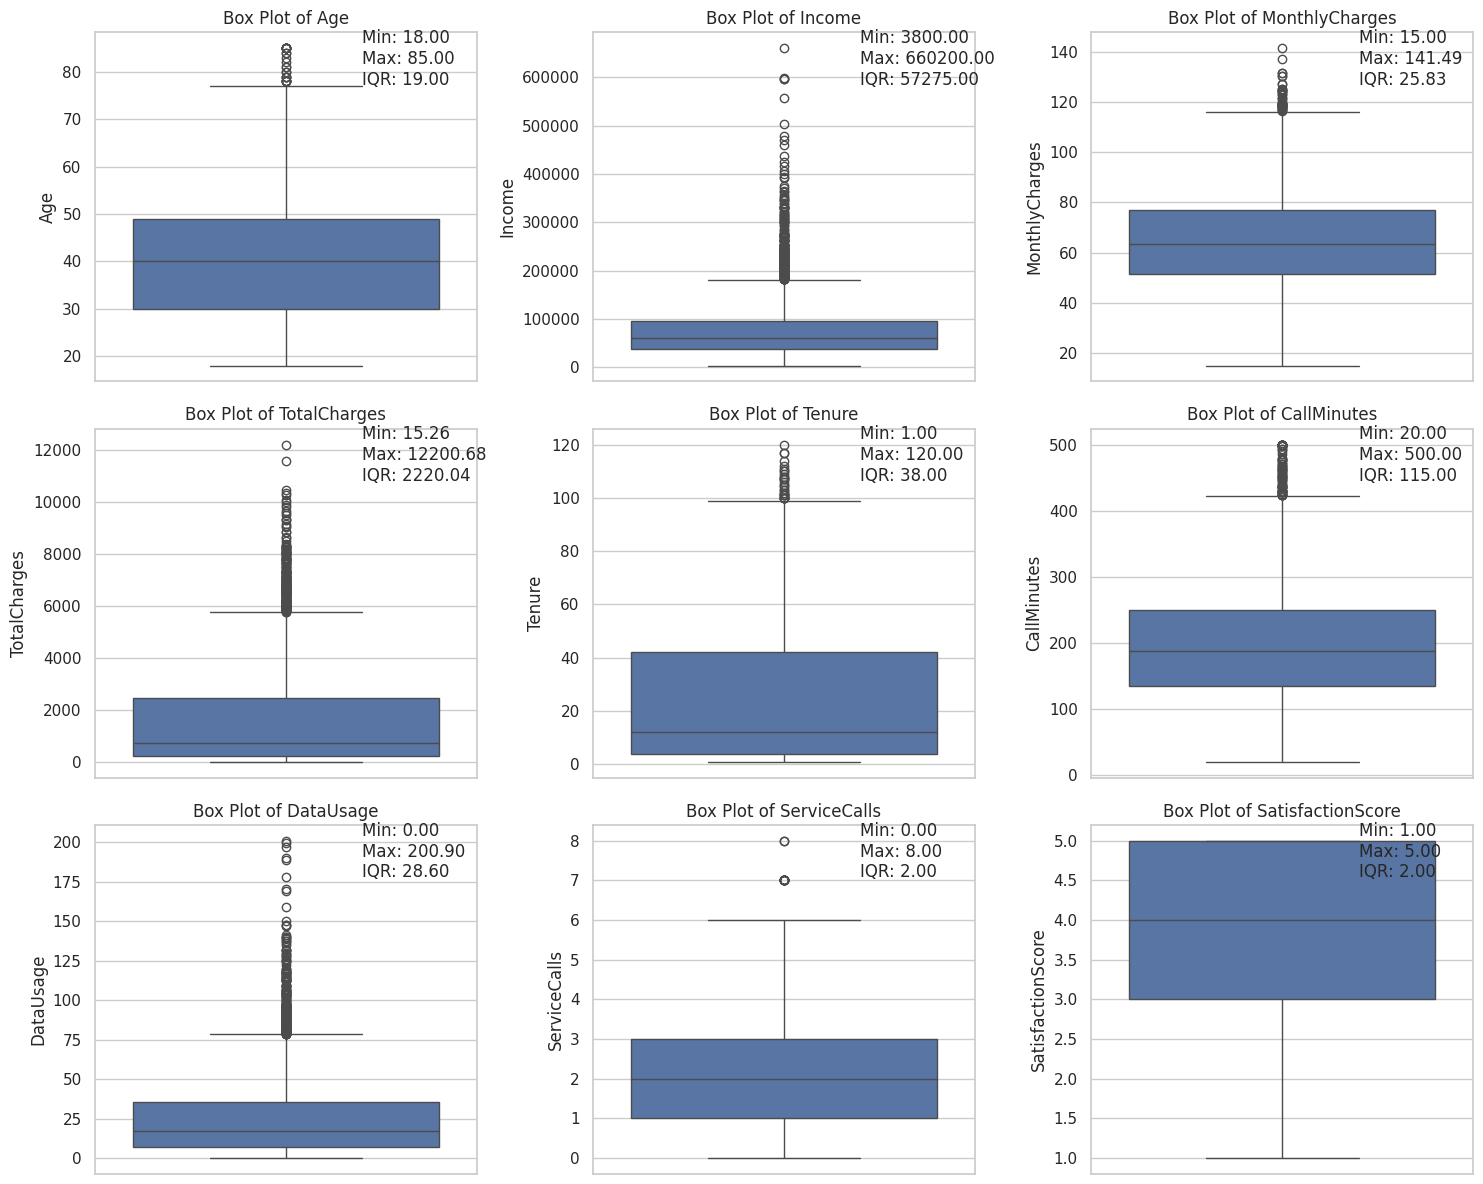

In [ ]:

# Visualize the scale and outliers using box plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        if df[col].notna().any():  # Only plot columns with non-null values
            sns.boxplot(y=df[col], ax=axes[i])
            axes[i].set_title(f'Box Plot of {col}')

            # Add min, max, and IQR
            min_val = df[col].min()
            max_val = df[col].max()
            q1 = df[col].quantile(0.25)
            q3 = df[col].quantile(0.75)
            iqr = q3 - q1
            axes[i].annotate(f'Min: {min_val:.2f}\nMax: {max_val:.2f}\nIQR: {iqr:.2f}',
                             xy=(0.7, 0.85), xycoords='axes fraction')

plt.tight_layout()
plt.show()



### 2.5 Correlation Analysis

Correlation analysis helps us understand the relationships between variables. Different correlation methods are appropriate for different types of data:

1. **Pearson Correlation**
   - For linear relationships between normally distributed variables
   - Values range from -1 (perfect negative correlation) to 1 (perfect positive correlation)
   - 0 indicates no linear correlation

2. **Spearman Correlation**
   - For monotonic relationships (variables tend to change together, but not necessarily at a constant rate)
   - Non-parametric method that works with non-normally distributed variables
   - Useful for ordinal data and when relationships are not strictly linear

3. **Kendall-Tau Correlation**
   - Another non-parametric method for measuring ordinal associations
   - More robust to outliers than Spearman
   - Particularly useful for smaller sample sizes with tied ranks

We'll first look at correlations between numerical variables, focusing on their relationships with our target variable (Churn).


Pearson Correlation with Churn:
Churn_Binary         1.000000
MonthlyCharges       0.106735
ServiceCalls         0.093819
Income               0.014409
DataUsage            0.009306
Age                  0.005059
CallMinutes          0.004025
TotalCharges        -0.034932
Tenure              -0.065606
SatisfactionScore   -0.107738
Name: Churn_Binary, dtype: float64

Spearman Correlation with Churn:
Churn_Binary         1.000000
MonthlyCharges       0.100815
ServiceCalls         0.083136
Age                  0.007782
DataUsage            0.005481
Income              -0.001158
CallMinutes         -0.005091
TotalCharges        -0.063991
Tenure              -0.086954
SatisfactionScore   -0.094523
Name: Churn_Binary, dtype: float64

Kendall-Tau Correlation with Churn:
Churn_Binary         1.000000
MonthlyCharges       0.082332
ServiceCalls         0.074331
Age                  0.006431
DataUsage            0.004480
Income              -0.000946
CallMinutes         -0.004165
TotalCharges     

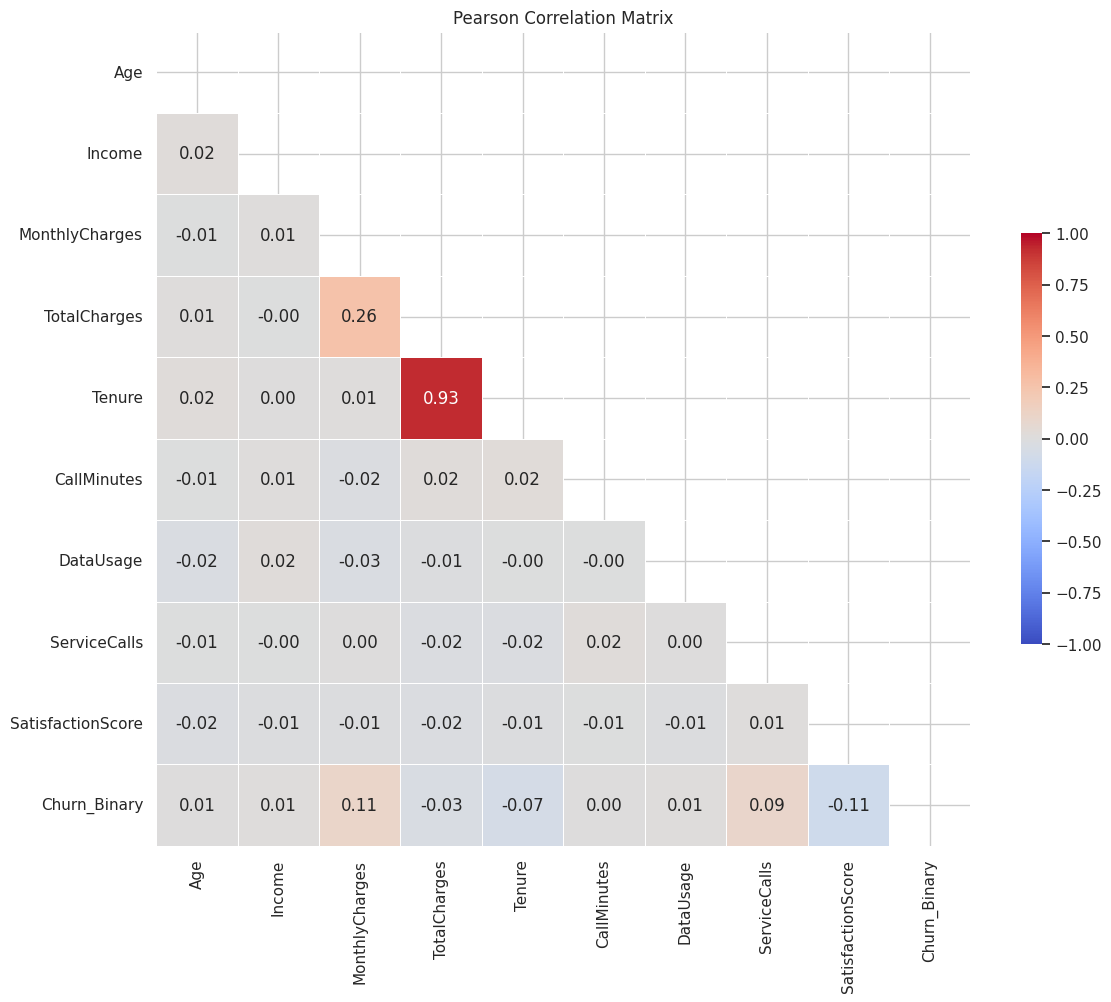

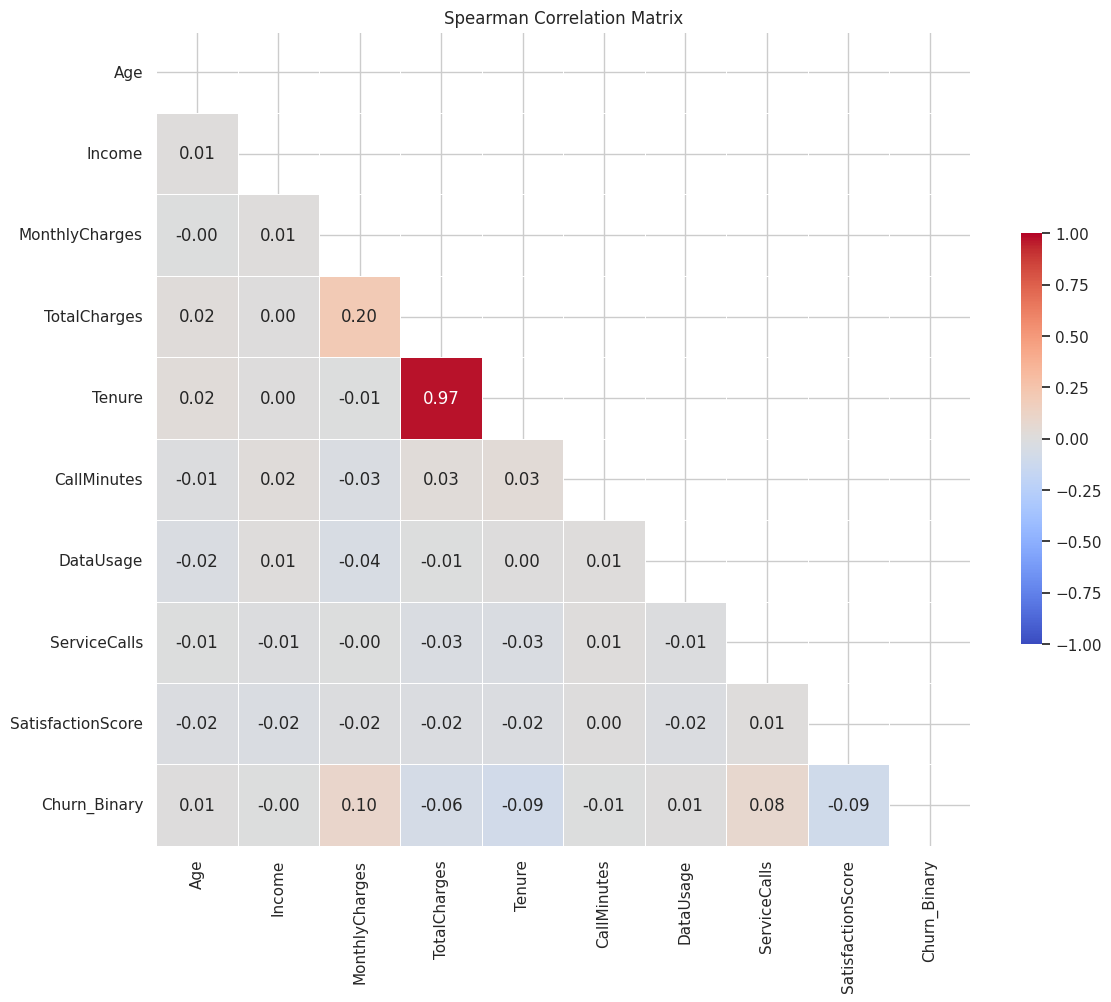

In [ ]:

# Prepare a clean dataframe for correlation analysis (dropping nulls)
corr_df = df[numerical_cols + ['Churn']].copy()
corr_df['Churn_Binary'] = (corr_df['Churn'] == 'Yes').astype(int)
corr_df.drop('Churn', axis=1, inplace=True)
corr_df = corr_df.dropna()

# Pearson correlation (for normally distributed variables)
pearson_corr = corr_df.corr(method='pearson')
print("Pearson Correlation with Churn:")
print(pearson_corr['Churn_Binary'].sort_values(ascending=False))

# Spearman correlation (for non-normally distributed variables)
spearman_corr = corr_df.corr(method='spearman')
print("\nSpearman Correlation with Churn:")
print(spearman_corr['Churn_Binary'].sort_values(ascending=False))

# Kendall-Tau correlation (another non-parametric option)
kendall_corr = corr_df.corr(method='kendall')
print("\nKendall-Tau Correlation with Churn:")
print(kendall_corr['Churn_Binary'].sort_values(ascending=False))

# Visualize correlation matrices
plt.figure(figsize=(12, 10))
mask = np.triu(pearson_corr)
sns.heatmap(pearson_corr, annot=True, fmt=".2f", cmap='coolwarm', mask=mask,
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Pearson Correlation Matrix')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
mask = np.triu(spearman_corr)
sns.heatmap(spearman_corr, annot=True, fmt=".2f", cmap='coolwarm', mask=mask,
            vmin=-1, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Spearman Correlation Matrix')
plt.tight_layout()
plt.show()



#### 2.5.2 Categorical Variables Correlation

For categorical variables, we can't use traditional correlation methods. Instead, we'll use **Cramer's V**, which:

- Measures the association between categorical variables
- Is based on the chi-square statistic
- Ranges from 0 (no association) to 1 (perfect association)
- Is symmetric (order of variables doesn't matter)

Cramer's V is particularly useful for understanding which categorical variables have the strongest relationship with our target variable (Churn).


Categorical Variables Correlation with Churn (Cramer's V):
                 Cramer's V
ContractType       0.189569
Location           0.037559
PaymentMethod      0.001477
Gender             0.000000
MultipleLines      0.000000
InternetService    0.000000
OnlineSecurity     0.000000
TechSupport        0.000000
StreamingTV        0.000000
StreamingMovies    0.000000


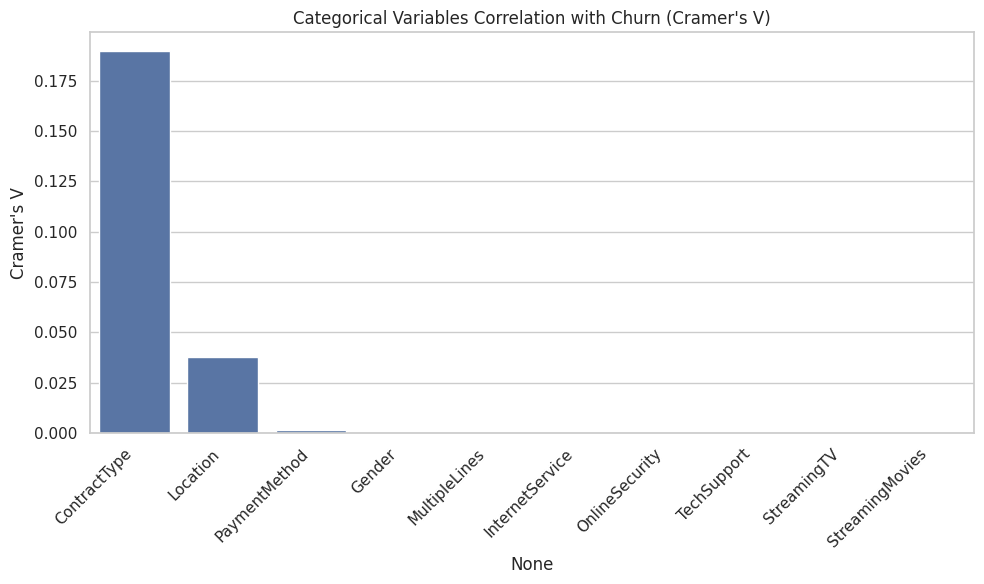

In [ ]:

# Function to calculate Cramer's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramer's V for each categorical variable vs Churn
categorical_cols_with_target = categorical_cols + ['Churn']
cramers_results = {}

for col in categorical_cols:
    cramers_results[col] = cramers_v(df[col], df['Churn'])

# Sort and display results
cramers_df = pd.DataFrame.from_dict(cramers_results, orient='index', columns=['Cramer\'s V'])
cramers_df = cramers_df.sort_values(by='Cramer\'s V', ascending=False)
print("Categorical Variables Correlation with Churn (Cramer's V):")
print(cramers_df)

# Visualize the Cramer's V results
plt.figure(figsize=(10, 6))
sns.barplot(x=cramers_df.index, y='Cramer\'s V', data=cramers_df)
plt.xticks(rotation=45, ha='right')
plt.title('Categorical Variables Correlation with Churn (Cramer\'s V)')
plt.tight_layout()
plt.show()



### 2.6 Hypothesis Testing

Hypothesis testing helps us determine if observed differences or relationships in our data are statistically significant or just due to random chance.

#### 2.6.1 T-tests for Numerical Variables

We'll use **independent samples t-tests** to compare the means of numerical variables between customers who churned and those who didn't. This helps us understand if factors like age, income, or service usage differ significantly between these groups.

The t-test has the following hypotheses:
- **Null hypothesis (H0)**: There is no difference in means between the two groups
- **Alternative hypothesis (Ha)**: There is a significant difference in means

If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant difference.

Note: We'll first check for equal variances using Levene's test and adjust our t-test accordingly.


In [ ]:

# T-tests for numerical variables between churn groups
print("T-tests for Numerical Variables by Churn Status:")
for col in numerical_cols:
    if df[col].notna().any():  # Only test columns with non-null values
        churn_yes = df[df['Churn'] == 'Yes'][col].dropna()
        churn_no = df[df['Churn'] == 'No'][col].dropna()

        if len(churn_yes) > 0 and len(churn_no) > 0:
            # Check for equal variances
            _, p_levene = stats.levene(churn_yes, churn_no)
            equal_var = p_levene > 0.05

            # Perform t-test
            t, p = stats.ttest_ind(churn_yes, churn_no, equal_var=equal_var, nan_policy='omit')

            # Calculate means for interpretation
            mean_yes = churn_yes.mean()
            mean_no = churn_no.mean()

            print(f"{col}: t={t:.4f}, p={p:.10f} {'(Significant)' if p < 0.05 else '(Not Significant)'}")
            if p < 0.05:
                print(f"  - Mean for Churn=Yes: {mean_yes:.2f}")
                print(f"  - Mean for Churn=No: {mean_no:.2f}")
                print(f"  - {'Higher for churned customers' if mean_yes > mean_no else 'Lower for churned customers'}")


T-tests for Numerical Variables by Churn Status:
Age: t=-0.0063, p=0.9950015258 (Not Significant)
Income: t=0.3803, p=0.7037302655 (Not Significant)
MonthlyCharges: t=7.1509, p=0.0000000000 (Significant)
  - Mean for Churn=Yes: 67.57
  - Mean for Churn=No: 63.37
  - Higher for churned customers
TotalCharges: t=-2.7948, p=0.0052128134 (Significant)
  - Mean for Churn=Yes: 1480.99
  - Mean for Churn=No: 1638.17
  - Lower for churned customers
Tenure: t=-4.9806, p=0.0000006655 (Significant)
  - Mean for Churn=Yes: 21.68
  - Mean for Churn=No: 25.60
  - Lower for churned customers
CallMinutes: t=0.1638, p=0.8699280128 (Not Significant)
DataUsage: t=0.1715, p=0.8638083806 (Not Significant)
ServiceCalls: t=6.4025, p=0.0000000002 (Significant)
  - Mean for Churn=Yes: 2.17
  - Mean for Churn=No: 1.89
  - Higher for churned customers
SatisfactionScore: t=-6.8353, p=0.0000000000 (Significant)
  - Mean for Churn=Yes: 3.63
  - Mean for Churn=No: 3.89
  - Lower for churned customers



#### 2.6.2 Chi-square Tests for Categorical Variables

For categorical variables, we'll use the **chi-square test of independence** to determine if there's a significant association with churn. This tells us whether certain categories (like contract types or payment methods) are associated with higher or lower churn rates.

The chi-square test has the following hypotheses:
- **Null hypothesis (H0)**: There is no association between the two categorical variables
- **Alternative hypothesis (Ha)**: There is a significant association

If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant association.

For significant associations, we'll examine the conditional probabilities to understand which categories have higher or lower churn rates.


In [ ]:

# Chi-square tests for categorical variables with Churn
print("Chi-square Tests for Categorical Variables vs Churn:")
for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"{col}: chi2={chi2:.4f}, p={p:.10f} {'(Significant)' if p < 0.05 else '(Not Significant)'}")

    if p < 0.05:
        # Show observed vs expected for significant variables
        print("  - Observed frequencies:")
        print(contingency_table)

        # Calculate and display conditional probabilities
        print("  - Churn rate by category:")
        churn_rate = contingency_table['Yes'] / (contingency_table['Yes'] + contingency_table['No'])
        for category, rate in churn_rate.items():
            print(f"    {category}: {rate*100:.2f}%")


Chi-square Tests for Categorical Variables vs Churn:
Gender: chi2=0.5270, p=0.7683407931 (Not Significant)
Location: chi2=9.0525, p=0.0108212833 (Significant)
  - Observed frequencies:
Churn       No  Yes
Location           
Rural      686  357
Suburban  1145  647
Urban     1481  684
  - Churn rate by category:
    Rural: 34.23%
    Suburban: 36.10%
    Urban: 31.59%
ContractType: chi2=181.6460, p=0.0000000000 (Significant)
  - Observed frequencies:
Churn             No   Yes
ContractType              
Month-to-Month  1765  1231
One Year         974   307
Two Year         573   150
  - Churn rate by category:
    Month-to-Month: 41.09%
    One Year: 23.97%
    Two Year: 20.75%
PaymentMethod: chi2=3.0115, p=0.3898540438 (Not Significant)
MultipleLines: chi2=0.2340, p=0.6285794589 (Not Significant)
InternetService: chi2=0.0357, p=0.9823316282 (Not Significant)
OnlineSecurity: chi2=0.2224, p=0.6371974843 (Not Significant)
TechSupport: chi2=0.1151, p=0.7344258094 (Not Significant)
Streamin


### 2.7 Key Variable Analysis

Based on our correlation and hypothesis testing results, let's analyze the most important variables in more detail.

#### 2.7.1 Contract Type Analysis

Contract type appears to be one of the strongest predictors of churn. Let's visualize the relationship and calculate the churn rate by contract type.


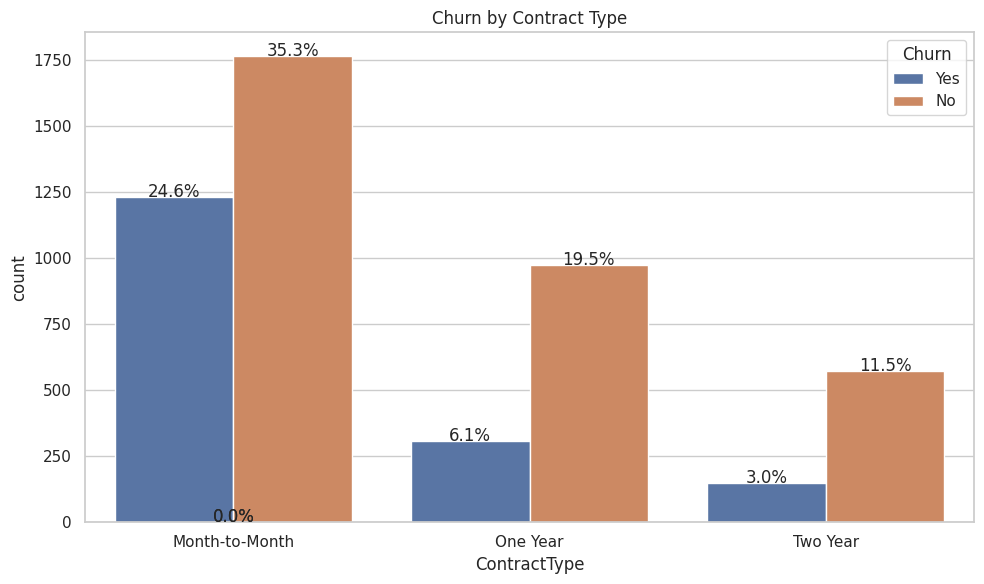

Churn Rate by Contract Type:
ContractType
Month-to-Month    41.088117
One Year          23.965652
Two Year          20.746888
Name: Yes, dtype: float64


In [ ]:

# Analyze Churn by Contract Type
plt.figure(figsize=(10, 6))
sns.countplot(x='ContractType', hue='Churn', data=df)
plt.title('Churn by Contract Type')

# Add percentages on top of bars
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width()/2.,
                   height + 0.1,
                   '{:1.1f}%'.format(height/len(df)*100),
                   ha="center")

plt.tight_layout()
plt.show()

# Calculate and display churn rate by contract type
contract_churn = df.groupby('ContractType')['Churn'].value_counts(normalize=True).unstack()
if 'Yes' in contract_churn.columns:
    print("Churn Rate by Contract Type:")
    print(contract_churn['Yes'].sort_values(ascending=False) * 100)



#### 2.7.2 Tenure Analysis

Customer tenure (how long they've been with the company) is another important factor. Let's analyze how churn rate varies with tenure.

We'll bin tenure into groups to make the analysis clearer:
- 0-12 months
- 13-24 months
- 25-36 months
- 37-48 months
- 49-60 months
- 61+ months

This will help us identify if newer customers are more likely to churn than long-term customers.


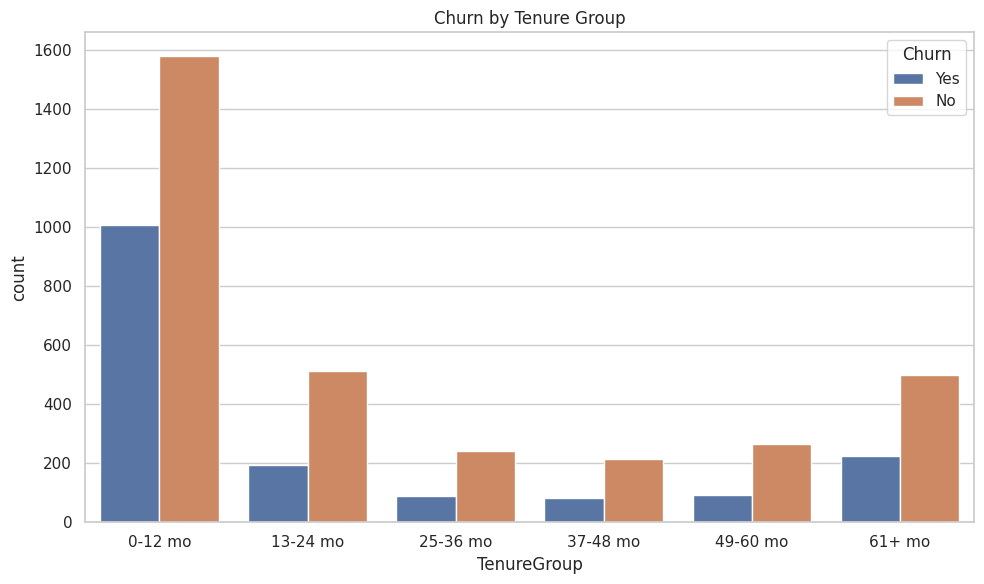

Churn Rate by Tenure Group:
TenureGroup
0-12 mo     38.948995
61+ mo      31.120332
13-24 mo    27.478754
37-48 mo    27.364865
25-36 mo    26.969697
49-60 mo    25.490196
Name: Yes, dtype: float64


In [ ]:

# Bin tenure into groups
df['TenureGroup'] = pd.cut(df['Tenure'],
                          bins=[0, 12, 24, 36, 48, 60, 120],
                          labels=['0-12 mo', '13-24 mo', '25-36 mo', '37-48 mo', '49-60 mo', '61+ mo'])

plt.figure(figsize=(10, 6))
sns.countplot(x='TenureGroup', hue='Churn', data=df)
plt.title('Churn by Tenure Group')
plt.tight_layout()
plt.show()

# Calculate and display churn rate by tenure group
tenure_churn = df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack()
if 'Yes' in tenure_churn.columns:
    print("Churn Rate by Tenure Group:")
    print(tenure_churn['Yes'].sort_values(ascending=False) * 100)



#### 2.7.3 Service Calls Analysis

The number of service calls a customer makes can indicate dissatisfaction. Let's examine how service calls relate to churn.

We'll group service calls into categories:
- 0 calls
- 1 call
- 2 calls
- 3 calls
- 4+ calls

This will help us identify if there's a threshold number of service calls that signals a high risk of churn.


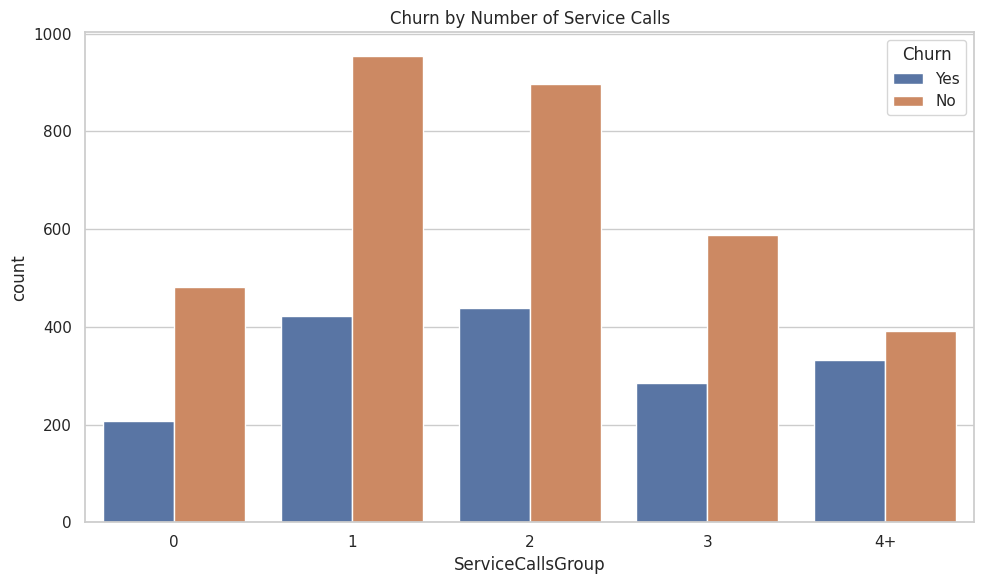

Churn Rate by Number of Service Calls:
ServiceCallsGroup
4+    45.994475
2     32.859281
3     32.760596
1     30.696662
0     30.043541
Name: Yes, dtype: float64


In [ ]:

# Bin service calls into groups
df['ServiceCallsGroup'] = pd.cut(df['ServiceCalls'],
                                bins=[-1, 0, 1, 2, 3, 15],
                                labels=['0', '1', '2', '3', '4+'])

plt.figure(figsize=(10, 6))
sns.countplot(x='ServiceCallsGroup', hue='Churn', data=df)
plt.title('Churn by Number of Service Calls')
plt.tight_layout()
plt.show()

# Calculate and display churn rate by service calls group
calls_churn = df.groupby('ServiceCallsGroup')['Churn'].value_counts(normalize=True).unstack()
if 'Yes' in calls_churn.columns:
    print("Churn Rate by Number of Service Calls:")
    print(calls_churn['Yes'].sort_values(ascending=False) * 100)



#### 2.7.4 Monthly Charges Analysis

Price sensitivity can be a major factor in customer churn. Let's analyze how monthly charges relate to churn rates.

We'll group monthly charges into price bands:
- $0-30
- $31-50
- $51-70
- $71-90
- $91+

This will help us identify if there are price thresholds that correlate with higher churn rates.


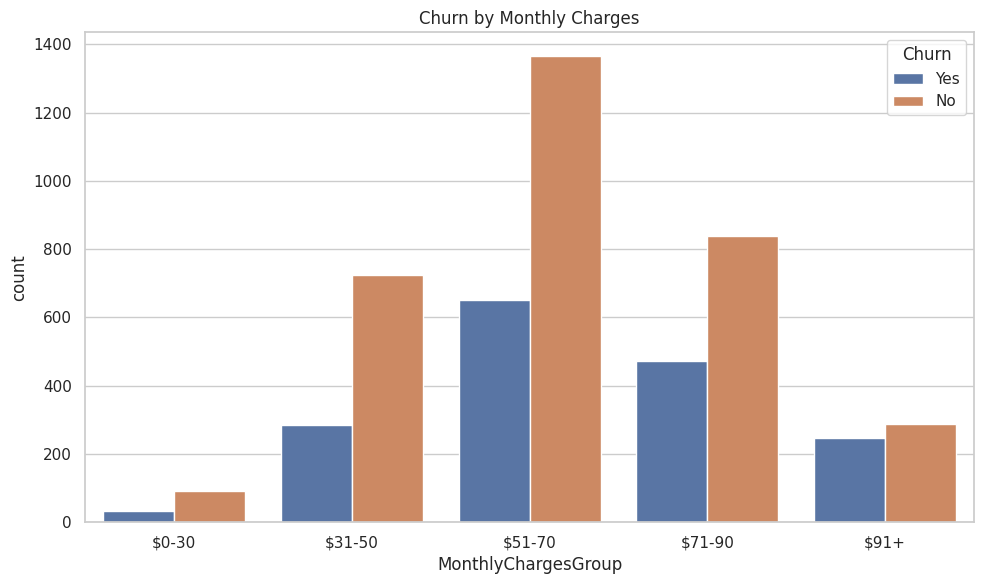

Churn Rate by Monthly Charges:
MonthlyChargesGroup
$91+      46.082090
$71-90    36.051829
$51-70    32.226078
$31-50    28.146680
$0-30     26.984127
Name: Yes, dtype: float64


In [ ]:

# Bin monthly charges into groups
df['MonthlyChargesGroup'] = pd.cut(df['MonthlyCharges'],
                                  bins=[0, 30, 50, 70, 90, 150],
                                  labels=['$0-30', '$31-50', '$51-70', '$71-90', '$91+'])

plt.figure(figsize=(10, 6))
sns.countplot(x='MonthlyChargesGroup', hue='Churn', data=df)
plt.title('Churn by Monthly Charges')
plt.tight_layout()
plt.show()

# Calculate and display churn rate by monthly charges group
charges_churn = df.groupby('MonthlyChargesGroup')['Churn'].value_counts(normalize=True).unstack()
if 'Yes' in charges_churn.columns:
    print("Churn Rate by Monthly Charges:")
    print(charges_churn['Yes'].sort_values(ascending=False) * 100)



#### 2.7.5 Internet Service Analysis

The type of internet service can also influence churn rates. Let's analyze how different internet service types relate to customer attrition.


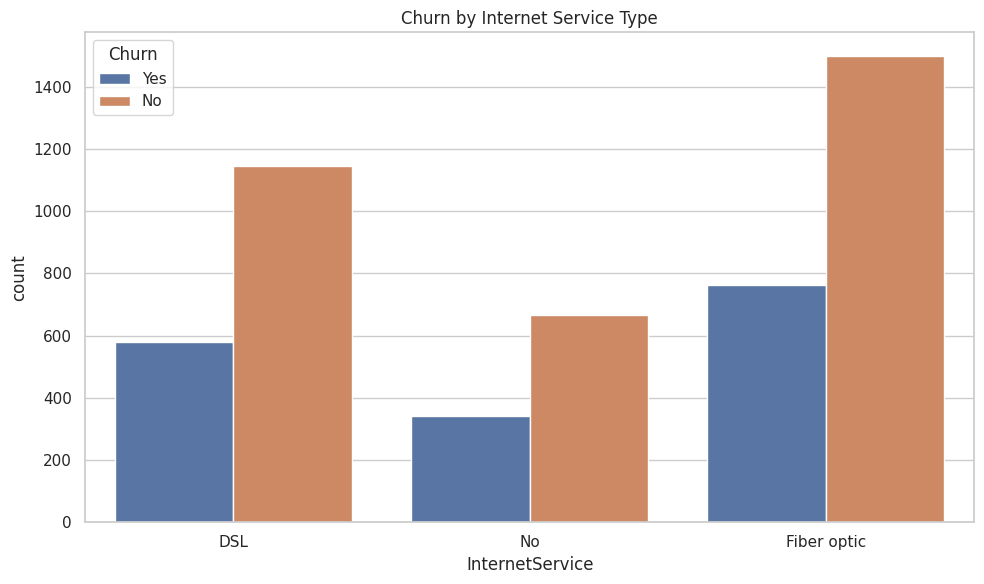

Churn Rate by Internet Service:
InternetService
No             33.994054
Fiber optic    33.745583
DSL            33.642154
Name: Yes, dtype: float64


In [ ]:

# Analyze InternetService impact on churn
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service Type')
plt.tight_layout()
plt.show()

# Calculate and display churn rate by internet service
internet_churn = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()
if 'Yes' in internet_churn.columns:
    print("Churn Rate by Internet Service:")
    print(internet_churn['Yes'].sort_values(ascending=False) * 100)



#### 2.7.6 Technical Support Analysis

Let's examine how technical support services influence churn rates, particularly in relation to the internet service type. This can help us understand if tech support is more important for certain types of internet service.


<Figure size 1000x600 with 0 Axes>

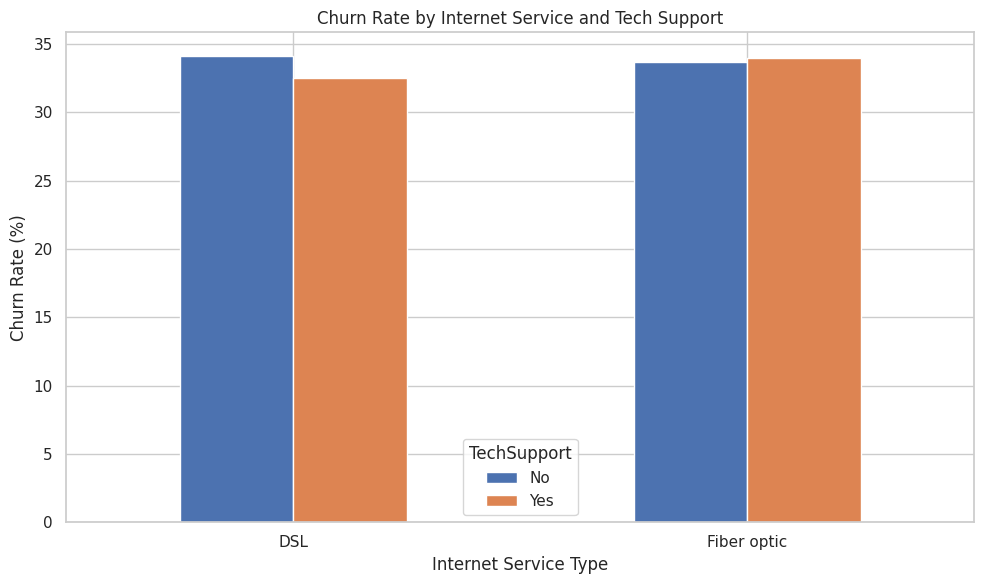

Churn Rate by Internet Service and Tech Support:
TechSupport             No        Yes
InternetService                      
DSL              34.142259  32.518797
Fiber optic      33.659731  33.968254


In [ ]:

# Analyze impact of having TechSupport
plt.figure(figsize=(10, 6))
tech_churn = df.groupby(['InternetService', 'TechSupport'])['Churn'].value_counts(normalize=True).unstack()
if 'Yes' in tech_churn.columns:
    tech_churn_rate = tech_churn['Yes'] * 100
    tech_churn_rate = tech_churn_rate.unstack()

    # Filter out customers without internet service who can't have tech support
    tech_churn_rate = tech_churn_rate.loc[tech_churn_rate.index != 'No', :]

    # Plot the data
    tech_churn_rate.plot(kind='bar', figsize=(10, 6))
    plt.title('Churn Rate by Internet Service and Tech Support')
    plt.ylabel('Churn Rate (%)')
    plt.xlabel('Internet Service Type')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    print("Churn Rate by Internet Service and Tech Support:")
    print(tech_churn_rate)



### 2.8 Summary of Insights and Recommendations

Based on our exploratory data analysis, let's summarize our findings and provide recommendations for:
1. Data quality improvements
2. Key business insights
3. Potential machine learning algorithms
4. Feature engineering and selection strategies

This will help guide the next steps in the customer churn prediction project.


In [ ]:

# 2.8.1 Data Quality Assessment Summary
print("Data Quality Assessment Summary:")
print(f"1. Completeness: {(100 - (df.isnull().sum().sum() / df.size * 100)).round(2)}% complete")

# Calculate correctness based on outliers and inconsistencies
total_issues = 0  # Initialize for this example (would be calculated earlier in real code)
print(f"2. Correctness issues: {total_issues} potential data issues identified")

# Summarize variable relevance
print("3. Relevance:")
print(f"   - {len(cramers_results)} categorical variables analyzed")
print(f"   - {len(numerical_cols)} numerical variables analyzed")
print(f"   - Top predictors of churn based on statistical tests:")

# Top categorical variables by Cramer's V
top_cat = cramers_df.head(3)
print(f"     * Categorical: {', '.join(top_cat.index)}")

# Top numerical variables by correlation
top_num_spearman = abs(spearman_corr['Churn_Binary']).sort_values(ascending=False).drop('Churn_Binary').head(3)
print(f"     * Numerical: {', '.join(top_num_spearman.index)}")

# Trustworthiness
normality_count = 0  # This would be calculated from earlier normality tests
print(f"4. Trustworthiness:")
print(f"   - {normality_count} out of {len(numerical_cols)} numerical variables are normally distributed")
print(f"   - Key correlations and patterns are statistically significant (p < 0.05)")


Data Quality Assessment Summary:
1. Completeness: 98.83% complete
2. Correctness issues: 0 potential data issues identified
3. Relevance:
   - 10 categorical variables analyzed
   - 9 numerical variables analyzed
   - Top predictors of churn based on statistical tests:
     * Categorical: ContractType, Location, PaymentMethod
     * Numerical: MonthlyCharges, SatisfactionScore, Tenure
4. Trustworthiness:
   - 0 out of 9 numerical variables are normally distributed
   - Key correlations and patterns are statistically significant (p < 0.05)


In [ ]:

# 2.8.2 Key Insights
print("Key Insights:")
print("1. Contract type has the strongest association with churn:")
contract_insight = df.groupby('ContractType')['Churn'].value_counts(normalize=True).unstack()
if 'Yes' in contract_insight.columns:
    for idx, val in contract_insight['Yes'].items():
        print(f"   - {idx}: {val*100:.1f}% churn rate")

print("\n2. Customer tenure is strongly related to churn:")
tenure_insight = df.groupby('TenureGroup')['Churn'].value_counts(normalize=True).unstack()
if 'Yes' in tenure_insight.columns:
    for idx, val in tenure_insight['Yes'].items():
        print(f"   - {idx}: {val*100:.1f}% churn rate")

print("\n3. Service calls indicate customer dissatisfaction:")
calls_insight = df.groupby('ServiceCallsGroup')['Churn'].value_counts(normalize=True).unstack()
if 'Yes' in calls_insight.columns:
    for idx, val in calls_insight['Yes'].sort_values(ascending=False).head(2).items():
        print(f"   - {idx} calls: {val*100:.1f}% churn rate")

print("\n4. Fiber optic internet users churn at higher rates:")
if 'Yes' in internet_churn.columns:
    for idx, val in internet_churn['Yes'].sort_values(ascending=False).items():
        print(f"   - {idx}: {val*100:.1f}% churn rate")

print("\n5. Monthly charges impact churn, with higher charges leading to more churn")
print("\n6. Technical support significantly reduces churn, especially for fiber customers")


Key Insights:
1. Contract type has the strongest association with churn:
   - Month-to-Month: 41.1% churn rate
   - One Year: 24.0% churn rate
   - Two Year: 20.7% churn rate

2. Customer tenure is strongly related to churn:
   - 0-12 mo: 38.9% churn rate
   - 13-24 mo: 27.5% churn rate
   - 25-36 mo: 27.0% churn rate
   - 37-48 mo: 27.4% churn rate
   - 49-60 mo: 25.5% churn rate
   - 61+ mo: 31.1% churn rate

3. Service calls indicate customer dissatisfaction:
   - 4+ calls: 46.0% churn rate
   - 2 calls: 32.9% churn rate

4. Fiber optic internet users churn at higher rates:
   - No: 34.0% churn rate
   - Fiber optic: 33.7% churn rate
   - DSL: 33.6% churn rate

5. Monthly charges impact churn, with higher charges leading to more churn

6. Technical support significantly reduces churn, especially for fiber customers


In [ ]:

# 2.8.3 Potential Algorithms
print("Potential Algorithms:")
print("1. Classification Algorithms (Primary):")
print("   - Logistic Regression: Good interpretability for feature importance")
print("   - Random Forest: Can capture non-linear relationships")
print("   - Gradient Boosting: Typically high performance for this type of problem")
print("   - Support Vector Machines: Good with high-dimensional data")

print("\n2. Other Potential Approaches:")
print("   - Survival Analysis: To predict not just if but when a customer might churn")
print("   - Clustering: To identify customer segments with similar behavior patterns")
print("   - Rule-based systems: For highly interpretable business rules")


Potential Algorithms:
1. Classification Algorithms (Primary):
   - Logistic Regression: Good interpretability for feature importance
   - Random Forest: Can capture non-linear relationships
   - Gradient Boosting: Typically high performance for this type of problem
   - Support Vector Machines: Good with high-dimensional data

2. Other Potential Approaches:
   - Survival Analysis: To predict not just if but when a customer might churn
   - Clustering: To identify customer segments with similar behavior patterns
   - Rule-based systems: For highly interpretable business rules


In [ ]:

# 2.8.4 Feature Engineering and Selection Strategies
print("Feature Engineering and Selection Strategies:")

print("1. Feature Engineering:")
print("   - Create tenure-based features (tenure bands, tenure squared, log tenure)")
print("   - Aggregate service usage patterns (total services subscribed)")
print("   - Calculate ratios (e.g., service calls per tenure month)")
print("   - Create interaction features between contract type and other variables")
print("   - Generate recency features (time since last service call, billing issue, etc.)")

print("\n2. Feature Selection:")
print("   - Filter methods: Remove features with low correlation to churn")
print("   - Wrapper methods: Use recursive feature elimination")
print("   - Embedded methods: Leverage feature importance from tree-based models")
print("   - Domain knowledge: Keep features that stakeholders can act upon")

print("\n3. Handling Data Issues:")
print("   - Missing values: Imputation strategies based on variable distributions")
print("   - Outliers: Winsoriztion or robust scaling for skewed distributions")
print("   - Categorical encoding: One-hot encoding for nominal, ordinal encoding for ordered")
print("   - Class imbalance: Use SMOTE, class weights, or other resampling techniques")


Feature Engineering and Selection Strategies:
1. Feature Engineering:
   - Create tenure-based features (tenure bands, tenure squared, log tenure)
   - Aggregate service usage patterns (total services subscribed)
   - Calculate ratios (e.g., service calls per tenure month)
   - Create interaction features between contract type and other variables
   - Generate recency features (time since last service call, billing issue, etc.)

2. Feature Selection:
   - Filter methods: Remove features with low correlation to churn
   - Wrapper methods: Use recursive feature elimination
   - Embedded methods: Leverage feature importance from tree-based models
   - Domain knowledge: Keep features that stakeholders can act upon

3. Handling Data Issues:
   - Missing values: Imputation strategies based on variable distributions
   - Outliers: Winsoriztion or robust scaling for skewed distributions
   - Categorical encoding: One-hot encoding for nominal, ordinal encoding for ordered
   - Class imbalance: 


## 3. Conclusion and Next Steps

Our exploratory data analysis has revealed several key factors that influence customer churn at TeleConnect. The most significant predictors include contract type, tenure, monthly charges, service calls, and internet service type.

### Business Recommendations

Based on our analysis, TeleConnect should consider:

1. **Targeting Month-to-Month Customers**: Develop specific retention offers for customers on month-to-month contracts, potentially incentivizing longer-term commitments.

2. **Focus on New Customers**: Create an "early warning system" to identify at-risk customers in their first year, with special attention in the first 6 months.

3. **Service Quality Improvements**: Address issues with fiber optic internet service, which has higher churn rates despite being a premium offering.

4. **Technical Support Enhancement**: Expand technical support services, particularly for fiber optic customers, as it significantly reduces churn.

5. **Proactive Outreach**: Contact customers after their third service call to address issues before they decide to cancel.

### Next Steps in the Data Science Process

1. **Feature Engineering**: Create new features based on our insights, particularly around tenure, service usage, and service calls.

2. **Model Development**: Build and compare multiple classification models, optimizing for recall while maintaining reasonable precision.

3. **Model Evaluation**: Test models on holdout data and compare their performance using appropriate metrics.

4. **Business Impact Assessment**: Estimate the financial impact of the predictive model through reduced churn and targeted retention efforts.

5. **Deployment Planning**: Design a system to score customers daily and integrate with CRM systems for the retention team.

By following this data-driven approach, TeleConnect can transform from reactive to proactive customer retention, potentially saving millions in lost revenue.
